In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

Text(0, 0.5, 'L(w)')

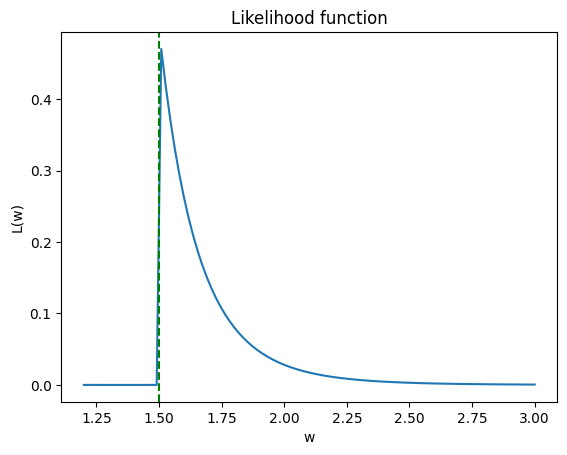

In [50]:
w_axis = np.linspace(1.2,3,100)
plt.plot(w_axis, [(lambda w: 28.8/w**10)(w) if w >= 1.5 else 0 for w in w_axis])
plt.axvline(1.5, c="g", linestyle="--")
plt.title("Likelihood function")
plt.xlabel("w")
plt.ylabel("L(w)")

In [32]:
df_train

,DATE,PRCP,TMAX,TMIN,RAIN,month
0,2005-01-01,0.05,45,37,True,1
1,2005-01-02,0.00,41,30,False,1
2,2005-01-03,0.00,40,28,False,1
3,2005-01-04,0.00,40,28,False,1
4,2005-01-05,0.00,39,24,False,1
...,...,...,...,...,...,...
1821,2009-12-27,0.00,44,28,False,12
1822,2009-12-28,0.00,49,35,False,12
1823,2009-12-29,0.06,43,30,True,12
1824,2009-12-30,0.02,46,36,True,12


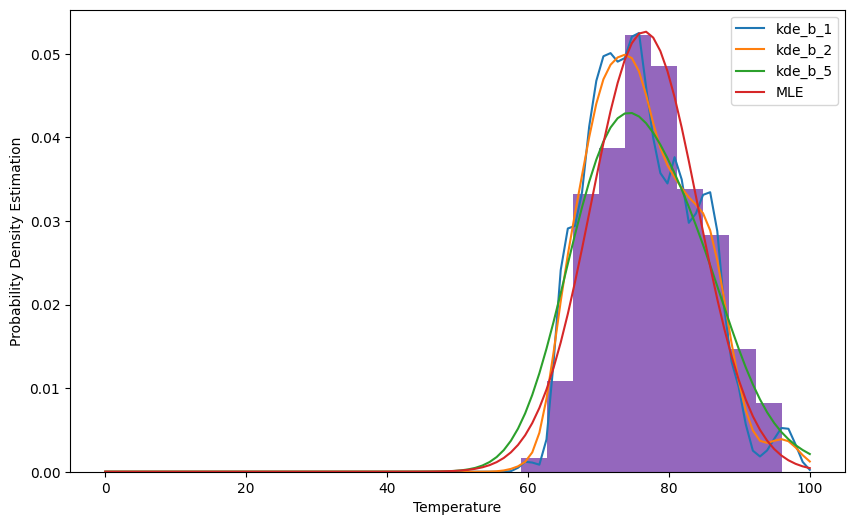

In [49]:
# kde function at an arbitrary data point
def gaussian_kernel(t, center, bandwidth):
    return 1 / (bandwidth * np.sqrt(2 * np.pi)) * np.exp(- 0.5 * ((t - center)/ bandwidth) ** 2);
    
# mle gaussian
def gaussian_pdf(t, mu_hat, sigma_hat):
    return (1 / (sigma_hat * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((t - mu_hat) / sigma_hat) ** 2)


# Compute kde for a single value
def kde(t, data_points, bandwidth):
    return (1 / len(data_points)) * sum([gaussian_kernel(t, data, bandwidth) for data in data_points]);
    
    
def train_kde(data_points, bandwidth):
    def trained_kde(t):
        return kde(t, data_points, bandwidth)
    
    return trained_kde
    
    
def train_mle(data_points):
    mu_hat = np.mean(data_points)
    sigma_hat = np.sqrt(np.mean((data_points - np.mean(data_points))**2))
    
    def trained_mle(t):
        return gaussian_pdf(t, mu_hat, sigma_hat)
    
    return trained_mle
    
    
def plot_kde(axis, trained_kde, label):
    plt.plot(axis, [trained_kde(point) for point in axis], label=label)

    
def plot_MLE(axis, trained_mle):
    plt.plot(axis, [trained_mle(point) for point in axis], label="MLE")
    

def plot_on_test(axis,trained_kdes, trained_mle, testing_data):
    for trained_kde in trained_kdes:
        plot_kde(axis, trained_kde, label="kde_b_"+trained_kde.name)
    plot_MLE(axis, trained_mle)
    plt.hist(testing_data, bins = 10, density="true")
    plt.xlabel("Temperature")
    plt.ylabel("Probability Density Estimation")
    plt.legend()
    

def run_plot_main(training_data, testing_data):
    plt.figure(figsize=(10, 6))
    bandwidths = [1,2,5]
    trained_kdes = []
    for bandwidth in bandwidths:
        trained_kde = train_kde(training_data, bandwidth)
        trained_kde.name = str(bandwidth)
        trained_kdes.append(trained_kde)
    trained_mle = train_mle(training_data)
    
    x_axis = np.linspace(0,100,100)
    plot_on_test(x_axis,trained_kdes, trained_mle, testing_data)
    
    
def run_program_on_month(training_data, testing_data, month="All"):
    
    if month == "All":
        run_plot_main(training_data["TMAX"], testing_data["TMAX"])  
    else:
        training_data = training_data[training_data["month"].isin(month)]["TMAX"]
        testing_data = testing_data[testing_data["month"].isin(month)]["TMAX"]
        run_plot_main(training_data, testing_data)      

    
def main():
    df_train = pd.read_csv("./weather_train.csv")
    df_test = pd.read_csv("./weather_test.csv")
    run_program_on_month(df_train, df_test, [7, 8])
    
main()